### Source
https://www.geeksforgeeks.org/how-to-create-animations-in-python/


#### Scatter Plot

/var/folders/06/tvbgw1c973l85brc653qbtpw0000gn/T/ipykernel_34610/1282213786.py:25: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(fig, animation_func,


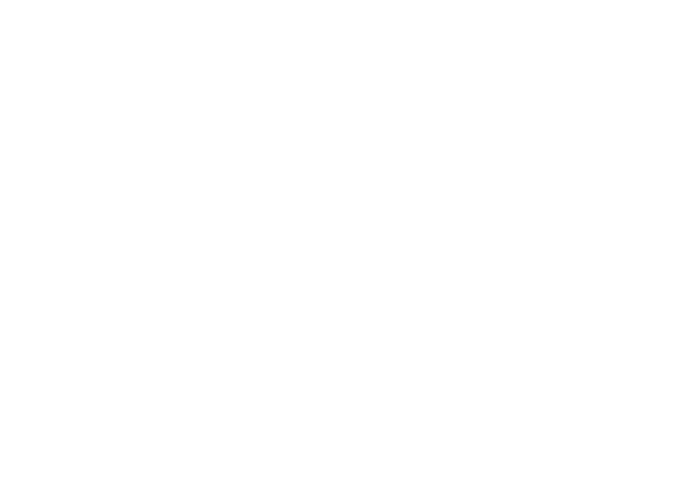

In [1]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import ipympl

import random
import numpy as np
%matplotlib ipympl



x = []
y = []
colors = []
fig = plt.figure(figsize=(7,5))

def animation_func(i):
    x.append(random.randint(0,100))
    y.append(random.randint(0,100))
    colors.append(np.random.rand(1))
    area = random.randint(0,30) * random.randint(0,30)
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.scatter(x, y, c=colors,s = area, alpha = 0.5)

animation = FuncAnimation(fig, animation_func, 
                          interval = 100)
plt.show()


/var/folders/06/tvbgw1c973l85brc653qbtpw0000gn/T/ipykernel_35242/3729308212.py:51: UserWarning: You passed in an explicit save_count=80 which is being ignored in favor of len(frames)=80.
  animation = FuncAnimation(fig, animation_func,  frames = range(0,80),save_count=80)


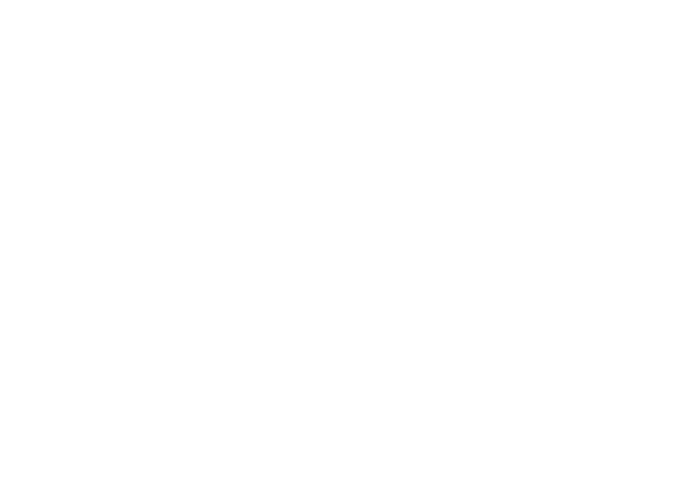

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 4.

In [7]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import ipympl
%matplotlib ipympl
import random
import numpy as np

# circle
import math
fig = plt.figure(figsize=(7,5))

def compute_circle(xo=0, yo=0, r=1.0, step_size = 0.05, steps=80):
    if r < 0:
        raise ValueError("Radius cannot be negative.")
    
    xl = []
    yl = []
    # Center of circule
    x = r
    y = 0.0
    step = step_size
    
    for i in range(steps):
        y = math.sqrt(r*r - x*x)
        xl.append(x)
        yl.append(y)
      # print(i,x,y) 
        if x-step < -r or x-step> r:
            step = -1.*step
        x -= step
    return xl, yl


xl,yl = compute_circle()
x = []
y = []
def animation_func(i):
    x.append(xl[i])
    y.append(yl[i])
    #x.append(i)
    #y.append(2*i)
    #print(x,y)
   # plt.xlim(-1,1)
   # plt.ylim(0,1)
    plt.scatter(x, y, c=1,alpha = 0.5)


#for i in range(80):
#    print(i, xl[i])

animation = FuncAnimation(fig, animation_func,  frames = range(0,80),save_count=80)
#plt.scatter(xl[0:20], yl[0:20],  alpha = 0.5)
plt.show()

In [ ]:
%matlab ipympl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

df = pd.read_csv('city_populations.csv',
                 usecols=['name', 'group', 'year', 'value'])

colors = dict(zip(['India','Europe','Asia',
                   'Latin America','Middle East',
                   'North America','Africa'],
                    ['#adb0ff', '#ffb3ff', '#90d595',
                     '#e48381', '#aafbff', '#f7bb5f', 
                     '#eafb50']))

group_lk = df.set_index('name')['group'].to_dict()

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value',
                                              ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'],
            color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['value'],
                                          dff['name'])):
        ax.text(value-dx, i,     name,           
                size=14, weight=600,
                ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name],
                size=10, color='#444444', 
                ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}', 
                size=14, ha='left',  va='center')
        
    # polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, 
            color='#777777', size=46, ha='right',
            weight=800)
    ax.text(0, 1.06, 'Population (thousands)',
            transform=ax.transAxes, size=12,
            color='#777777')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', 
            transform=ax.transAxes, ha='right', color='#777777', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
animator = FuncAnimation(fig, draw_barchart, 
                         frames = range(1990, 2019))
plt.show()